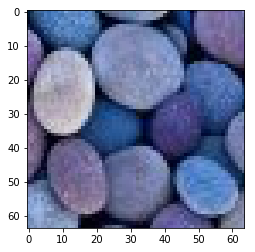

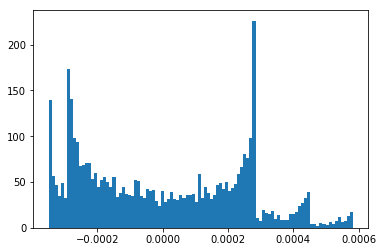

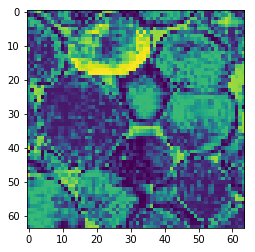

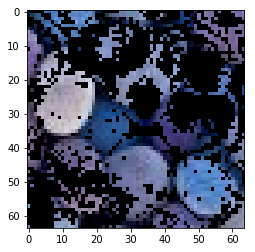

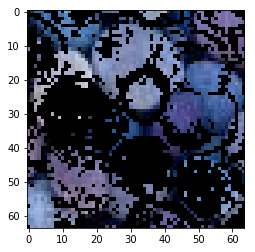

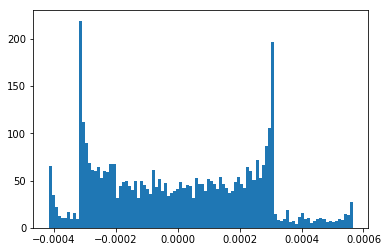

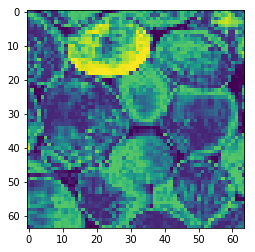

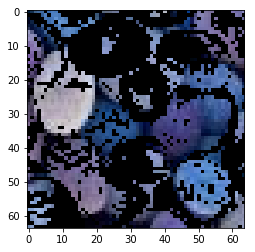

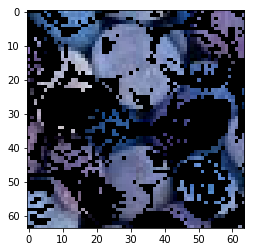

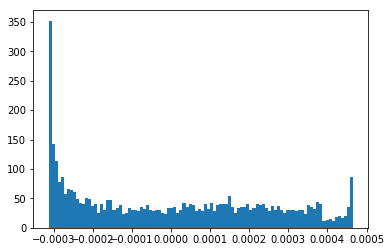

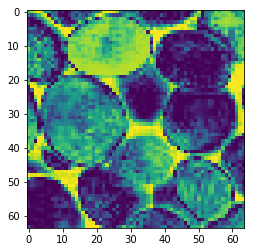

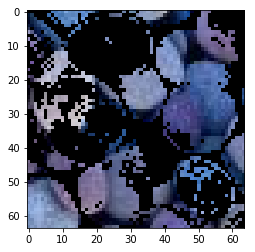

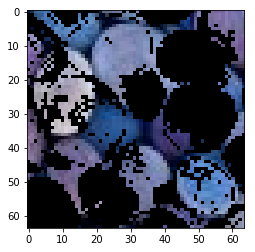

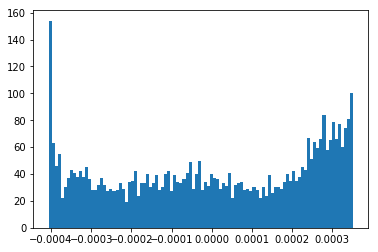

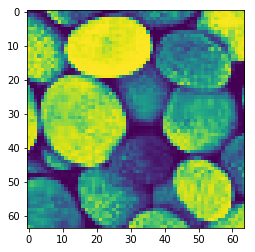

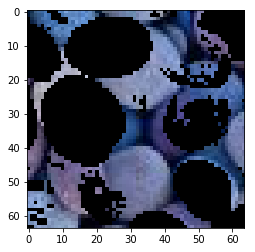

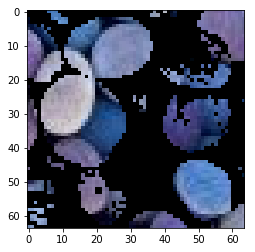

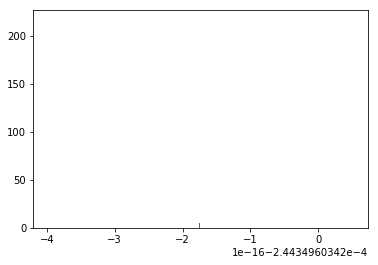

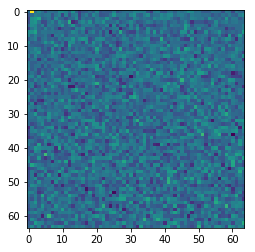

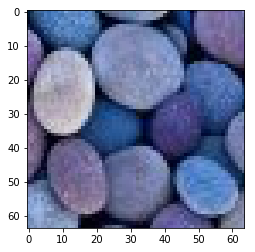

ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from scipy.linalg import eigh
from scipy.linalg import eigh
from numpy.linalg import inv


from numpy import exp

import numpy as np

img=mpimg.imread('stones_rgb.png')
plt.imshow(img)
plt.show()

r=2
sigma=10

N=64*64

W=[[0 for xvs in range(N)] for xvq in range(N)]

lam=np.matrix([[0.299,0.587,0.114],[-0.14713,-2.8886,0.436],[0.615,-0.51499,-0.10001]])

def wEuclid(v1, v2):
    q = lam * np.transpose(v1 - v2)
    return np.sqrt((q * q.T).sum())

def get(i):
    x=i%64
    y=i/64
    return img[x][y]

def sim(i,j):
    v1=np.matrix(get(i))
    v2=np.matrix(get(j))
    return exp(-wEuclid(v1,v2)/(2*sigma**2))

for i in range(N):
    for j in range(i,N):
        W[i][j]=sim(i,j)
        W[j][i]=W[i][j]

D=[[0 for xvs in range(N)] for xvq in range(N)]
for i in range(N):
    for j in range(N):
        D[i][i]+=W[i][j]

MD=np.matrix(D)
MD=np.matrix(sqrtm(MD))
MD=inv(MD)

L=MD*np.matrix(W)*MD

K=5

EVAL,Q=eigh(L,eigvals = (N-K,N-1))

V=MD*np.matrix(Q)

def takePlots(hs):
    plt.hist(hs,100)
    plt.show()
    ces=0
    tp=[[0 for xvs in range(64)]for xvq in range(64)]
    p1=[[[0,0,0] for xvs in range(64)] for xvq in range(64)]
    p2=[[[0,0,0] for xvs in range(64)] for xvq in range(64)]
    for i in range(64):
        for j in range(64):
            tp[i][j]=hs[ces]
            ces+=1
            if(tp[i][j]<0):
                p1[i][j]=img[i][j]
            else:
                p2[i][j]=img[i][j]
    plt.imshow(tp)
    plt.show()
    plt.imshow(p1)
    plt.show()
    plt.imshow(p2)
    plt.show()


for j in range(K):
    hs=[]
    for i in range(len(V)):
        hs.append(V[i,j])
    takePlots(hs)


Note: Running this code may take up to 15 minutes